In [1]:
#Importing necessory liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
car=pd.read_csv('/content/car_age_price.csv')

In [3]:
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
car.shape

(112, 2)

In [5]:
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [7]:
car.isna().sum()

Year     0
Price    0
dtype: int64

In [8]:
corr=car.corr(method='pearson')

<Axes: >

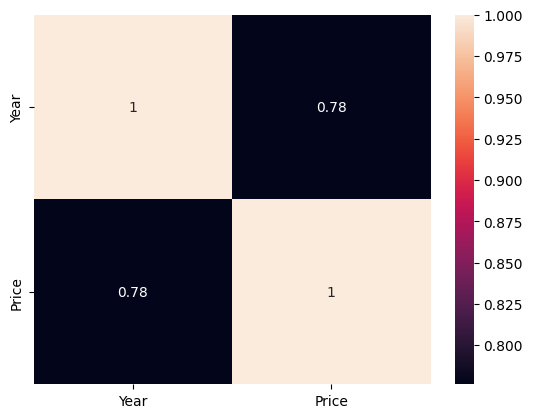

In [9]:
sns.heatmap(corr,annot=True)

<Axes: xlabel='Year', ylabel='Price'>

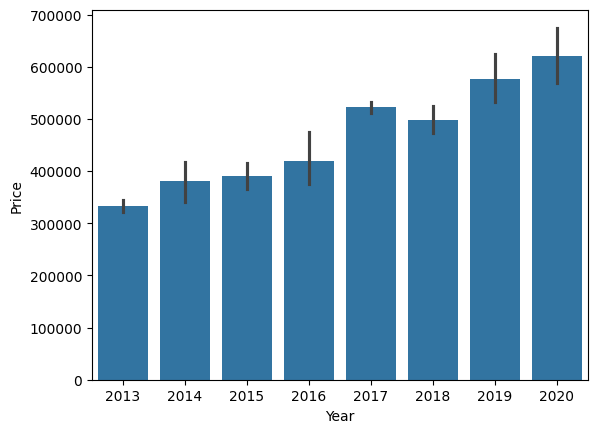

In [10]:
sns.barplot(x="Year",y="Price",data=car)

In [11]:
y=car['Price']
X=car.drop(['Price'],axis=1)
y=np.array(y)
y=y.reshape(-1,1)
y.shape
X.shape

(112, 1)

# Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
scaler_y=StandardScaler()
X=scaler_x.fit_transform(X)
y=scaler_y.fit_transform(y)

In [13]:
#Splitting datas for traing and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=28)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(89, 1) (23, 1) (89, 1) (23, 1)


In [14]:
#Create linear reggression Object
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#train the model with training set
model.fit(X_train,y_train)
#predict the output
y_predict=model.predict(X_test)

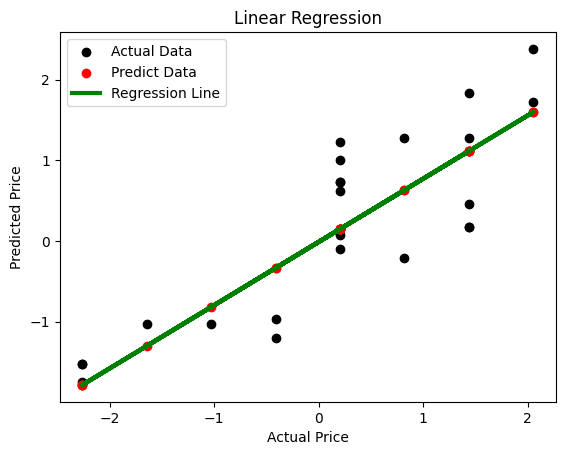

In [15]:
#Plot the outputs
plt.scatter(X_test,y_test,color='black',label='Actual Data')
plt.scatter(X_test,y_predict,color='red',label='Predict Data')
plt.plot(X_test,y_predict,color='green',linewidth=3,label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('LinearRegression \n----------------')
print('Mean_squared_error :',mean_squared_error(y_test,y_predict))
print('Mean_absolute_error:',mean_absolute_error(y_test,y_predict))
print('R2_score:',r2_score(y_test,y_predict))

LinearRegression 
----------------
Mean_squared_error : 0.379599144270818
Mean_absolute_error: 0.5315063468328858
R2_score: 0.7179045607182577


# Lasso Regression

In [17]:
from sklearn import linear_model
model_lasso= linear_model.Lasso(alpha=0.5)
model_lasso.fit(X_train,y_train)
y_predic_lasso=model_lasso.predict(X_test)


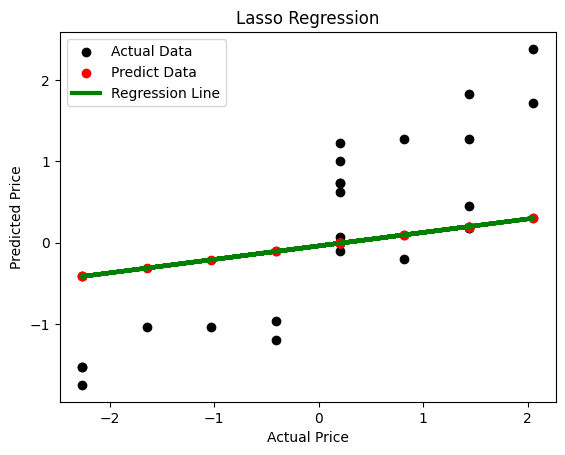

In [18]:
#Plot the outputs
plt.scatter(X_test,y_test,color='black',label='Actual Data')
plt.scatter(X_test,y_predic_lasso,color='red',label='Predict Data')
plt.plot(X_test,y_predic_lasso,color='green',linewidth=3,label='Regression Line')
plt.title('Lasso Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

In [19]:
#mean_squared_error,mean_absolute_error,r2_score for Lasso Model
print('Lasso Regression \n----------------')
print('Mean_squared_error :',mean_squared_error(y_test,y_predic_lasso))
print('Mean_absolute_error:',mean_absolute_error(y_test,y_predic_lasso))
print('R2_score:',r2_score(y_test,y_predic_lasso))

Lasso Regression 
----------------
Mean_squared_error : 1.0062139949117412
Mean_absolute_error: 0.8500393372101298
R2_score: 0.252241784023733


## *The Model having Mean_squared_error and Mean_absolute_error are close to Zero and R2_score is close to One is the best Model. It is clear in the diagram that Linear Model is predicting better price than the Lasso Model.So here LinearRegression Model can take as the best Model.*

# Price prediction of Year:2022 using Linear model

In [20]:
x=pd.DataFrame({'Year':[2022]})
Scaled_x=scaler_x.transform(x)
predic_price=model.predict(Scaled_x)
predicted_price=scaler_y.inverse_transform(predic_price)

print('Possible price of a 2022 model second-hand Hyundai-grand-i10 car using Linear Model is : ',predicted_price[0] )

Possible price of a 2022 model second-hand Hyundai-grand-i10 car using Linear Model is :  [716610.95919336]
